# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

Generowanie danych

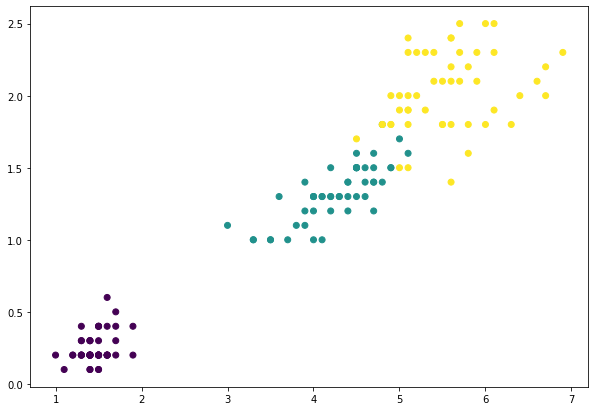

In [2]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()

X_iris = iris.data[:, [2, 3]]
y_iris = iris.target

plt.figure(figsize=(10, 7))


plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris)
plt.show()

data_X = iris.data[iris.target != 1, 3]
data_Y = iris.target[iris.target != 1]
data_Y = np.where(data_Y == data_Y.min(), 0, 1)

In [3]:
np.where(data_Y == data_Y.min(), 0, 1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [4]:
df = pd.DataFrame({'intercept': 1,
                   'data': data_X,
                   'label': data_Y})
display(df)

X = df[['intercept', 'data']].values
Y = df[['label']].values

,intercept,data,label
0,1,0.2,0
1,1,0.2,0
2,1,0.2,0
3,1,0.2,0
4,1,0.2,0
...,...,...,...
95,1,2.3,1
96,1,1.9,1
97,1,2.0,1
98,1,2.3,1


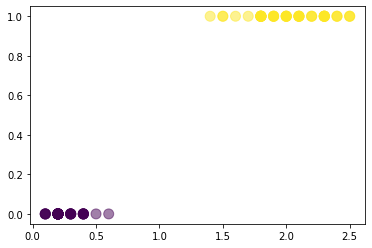

In [5]:
plt.scatter(data_X, data_Y, s=100, alpha=0.5, c=data_Y)
plt.show()

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='none', max_iter=10_000)
model.fit(data_X.reshape(-1, 1), data_Y)

model_reg = LogisticRegression(penalty='l2', max_iter=10_000)
model_reg.fit(data_X.reshape(-1, 1), data_Y)

LogisticRegression(max_iter=10000)

In [7]:
print(f"Non-reg model coef: {model.coef_[0, 0]:.2f}\tintercept: {model.intercept_[0]:.2f}")
print(f"    Reg model coef: {model_reg.coef_[0, 0]:.2f}\tintercept: {model_reg.intercept_[0]:.2f}")

Non-reg model coef: 22.74	intercept: -22.38
    Reg model coef: 3.62	intercept: -3.94


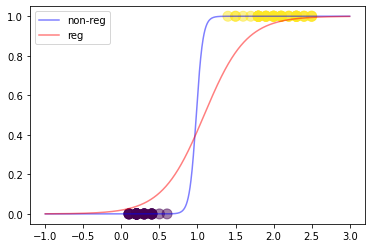

In [8]:
x = np.linspace(-1, 3, 1_000).reshape(-1, 1)
y = model.predict_proba(x)[:, 1]

y_reg = model_reg.predict_proba(x)[:, 1]

plt.plot(x, y, c='blue', alpha=0.5, label='non-reg')
plt.plot(x, y_reg, c='red', alpha=0.5, label='reg')
plt.scatter(data_X, data_Y, s=100, alpha=0.5, c=data_Y)
plt.legend()
plt.show()